# Task 7 - Some Visualizations
5390<br>
Elaina Rohlfing

## Load the data
* Upload & unzip the dataset
* Load training and validation images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! rm -rf morel-dataset
! unzip -qq "/content/drive/MyDrive/Colab Notebooks/morel-dataset.zip"
! mv morel-dataset* morel-dataset

In [ ]:
! ls -l morel-dataset/validation

total 8
drwxr-xr-x 2 root root 4096 May  3 04:57 morel
drwxr-xr-x 2 root root 4096 May  3 04:58 none


## Prepare the images (training and validation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

def get_raw_images(image_size=(256, 256), size_of_batch=32):
    img_generator = ImageDataGenerator()

    tr = img_generator.flow_from_directory( "./morel-dataset/train", target_size=image_size, shuffle=True, seed=999, class_mode='binary', classes=["none", "morel"], batch_size=size_of_batch)
    val = img_generator.flow_from_directory( "./morel-dataset/validation", target_size=image_size, shuffle=True, seed=999, class_mode='binary', classes=["none", "morel"], batch_size=size_of_batch)
    tst = img_generator.flow_from_directory( "./morel-dataset/test", target_size=image_size, shuffle=True, seed=999, class_mode='binary', classes=["none", "morel"], batch_size=size_of_batch)
    return tr, val, tst


# Review details of dataset
def print_data_characteristics(data):
    print(f'{data.class_indices=}')
    print(f'{data.num_classes=}')
    print(f'{data.batch_size=}')
    print(f'{data.samples=}')
    print(f'{data.image_shape=}')
    imgs, lbls = data[0]
    print(f'{lbls.shape=}')
    print(f'{lbls=}')

    # check baseline accurracy (for majority class in binary classification)
    num_class0 = data.classes[data.classes == 0].size
    num_class1 = data.classes[data.classes == 1].size
    class1_relative_size = (100 * (num_class1/(num_class0 + num_class1)))
    class0_relative_size = (100 - class1_relative_size)
    if class1_relative_size > class0_relative_size:
        print(f'\nMajority class is class[1]\nBaseline accuracy for this dataset is: {class1_relative_size:.2f}%')
    else:
        print(f'\nMajority class is class[0]\nBaseline accuracy for this dataset is: {class0_relative_size:.2f}%')


# Displays one image and its label
def display_image(dataset, img_index=0, batch_index=0, raw=False):
    norm = 255 if raw else 1
    images, labels = dataset[batch_index]
    class_index = int(labels[img_index])
    classes = list(dataset.class_indices.keys())

    plt.imshow(images[img_index] / norm)
    plt.title(f"Ground truth: {str(labels[img_index])}\n{classes[class_index]}") # add name of label train_ds.class_indices
    plt.axis("off")

# Displays multiple random images in a grid
def review_generator_results(image_gen, batch_number=0, num_images=6, num_rows=2, raw=True):
    indices = np.random.choice(image_gen.batch_size, size=num_images, replace=False)
    plt.figure(figsize=(12, 8))
    for i, img_idx in enumerate(indices):
        plt.subplot(num_rows, (len(indices) + 1) // num_rows, i + 1)
        display_image(image_gen, img_idx, batch_number, raw)
    plt.tight_layout()
    plt.show()
    print_data_characteristics(image_gen)

In [ ]:
train_set, val_set, test_set = get_raw_images(size_of_batch=64)

Found 552 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Display one image and its label

TRAINING SET


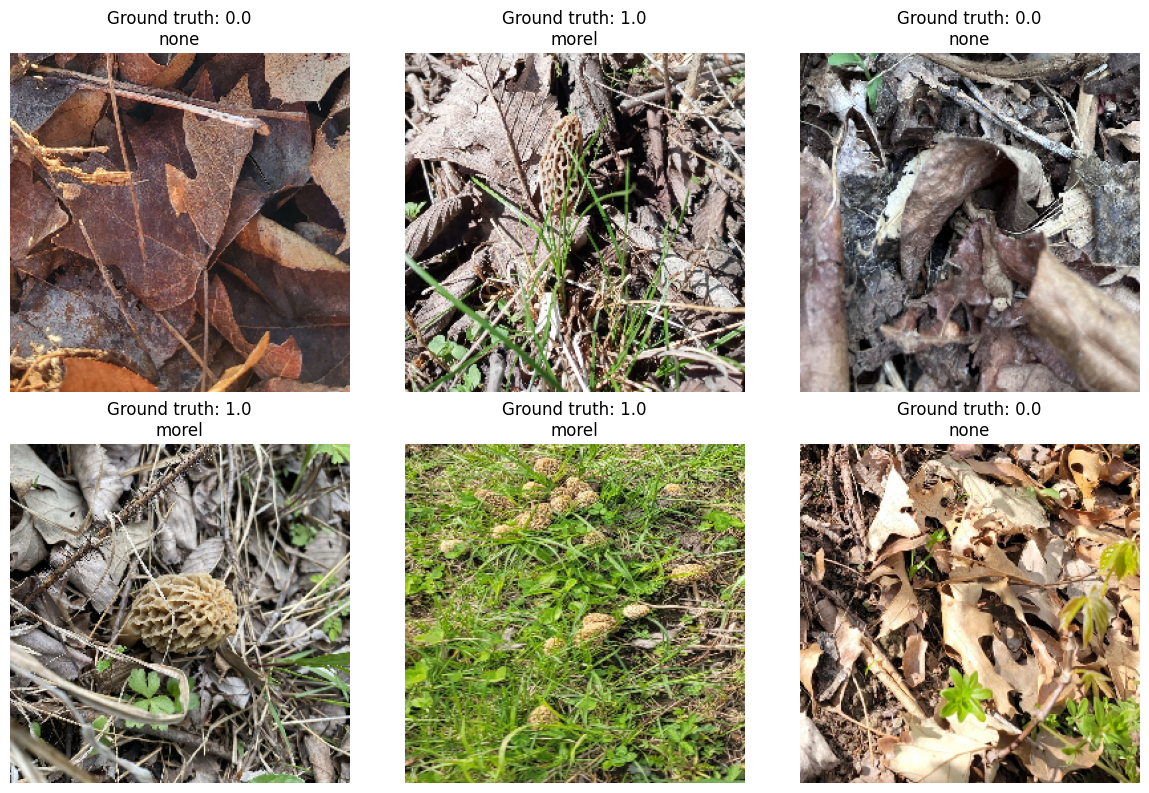

data.class_indices={'none': 0, 'morel': 1}
data.num_classes=2
data.batch_size=64
data.samples=552
data.image_shape=(256, 256, 3)
lbls.shape=(64,)
lbls=array([1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.], dtype=float32)

Majority class is class[0]
Baseline accuracy for this dataset is: 50.00%


In [ ]:
print('TRAINING SET')
review_generator_results(train_set, num_images=6, num_rows=2, batch_number=0, raw=True)

VALIDATION SET


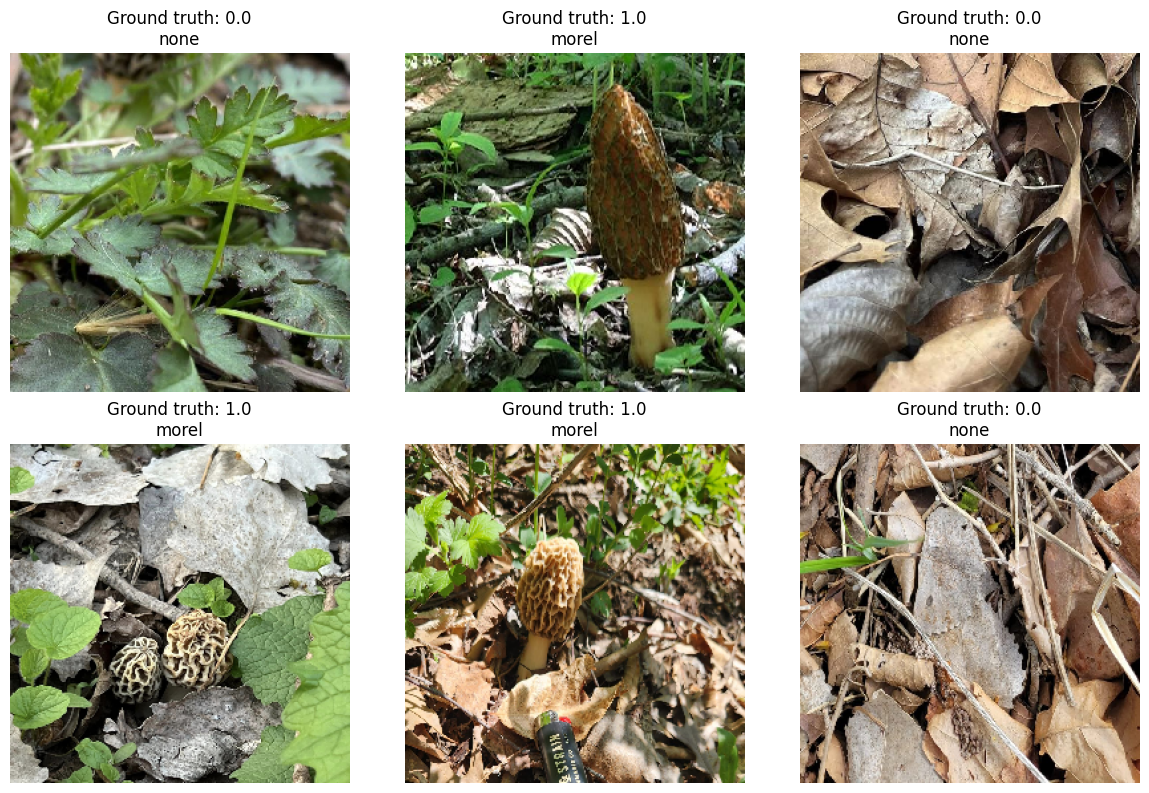

data.class_indices={'none': 0, 'morel': 1}
data.num_classes=2
data.batch_size=64
data.samples=160
data.image_shape=(256, 256, 3)
lbls.shape=(64,)
lbls=array([1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.], dtype=float32)

Majority class is class[0]
Baseline accuracy for this dataset is: 50.00%


In [ ]:
print('VALIDATION SET')
review_generator_results(val_set, num_images=6, num_rows=2, batch_number=0)

# Functions

## View Predictions

In [ ]:
# modified code from chatgpt
def plot_misclassified_images(model, data_generator, num_images_per_class=4):
    images, true_labels = data_generator.next()
    predictions = model.predict(images)
    predicted_labels = np.round(predictions).flatten().astype(int)  # Round predictions for binary classification

    misclassified_indices = np.where(predicted_labels != true_labels)[0][:10]
    misclassified_morel = np.where((predicted_labels == 1) & (predicted_labels != true_labels))[0][:]
    misclassified_none = np.where((predicted_labels == 0) & (predicted_labels != true_labels))[0][:]

    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(misclassified_none):
        image = images[idx]
        true_label = 'Morel' if true_labels[idx] == 1 else 'None'
        predicted_label = 'Morel' if predicted_labels[idx] == 1 else 'None'

        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nPredicted: {predictions[idx]}')
        plt.axis('off')
        if i == (num_images_per_class - 1): break
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 8))
    for j, idx in enumerate(misclassified_morel):
        image = images[idx]
        true_label = 'Morel' if true_labels[idx] == 1 else 'None'
        predicted_label = 'Morel' if predicted_labels[idx] == 1 else 'None'

        plt.subplot(1, num_images_per_class, j + 1)
        plt.imshow(image)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nPredicted: {predictions[idx]}')
        plt.axis('off')
        if j == (num_images_per_class - 1): break
    plt.tight_layout()
    plt.show()

In [ ]:
# modified code from chatgpt
def plot_successful_predictions(model, data_generator, num_images_per_class=4):
    images, true_labels = data_generator.next()
    predictions = model.predict(images)
    predicted_labels = np.round(predictions).flatten().astype(int)  # Round predictions for binary classification

    classified_indices = np.where(predicted_labels == true_labels)[0][:]
    classified_morel = np.where((predicted_labels == 1) & (predicted_labels == true_labels))[0][:]
    classified_none = np.where((predicted_labels == 0) & (predicted_labels == true_labels))[0][:]

    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(classified_none):
        image = images[idx]  # Get the image from the generator
        true_label = 'Morel' if true_labels[idx] == 1 else 'None'
        predicted_label = 'Morel' if predicted_labels[idx] == 1 else 'None'

        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nPredicted: {predictions[idx]}')
        plt.axis('off')
        if i == (num_images_per_class - 1): break
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))
    for j, idx in enumerate(classified_morel):
        image = images[idx]  # Get the image from the generator
        true_label = 'Morel' if true_labels[idx] == 1 else 'None'
        predicted_label = 'Morel' if predicted_labels[idx] == 1 else 'None'

        plt.subplot(1, num_images_per_class, j + 1)
        plt.imshow(image)
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nPredicted: {predictions[idx]}')
        plt.axis('off')
        if j == (num_images_per_class - 1): break
    plt.tight_layout()
    plt.show()

## Check activations

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

def get_img_array(img_path, target_size):
    image = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(image)
    array = np.expand_dims(array, axis=0)
    return array

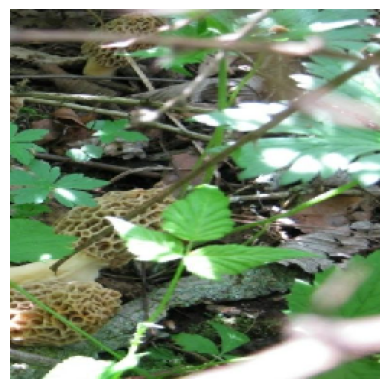

(1, 256, 256, 3)

In [ ]:
img_tensor = get_img_array("/content/0000000.jpg", target_size=(256, 256))

plt.imshow(img_tensor[0].astype('uint8'))
plt.axis('off')
plt.show()
img_tensor.shape

#model.predict(img_tensor)

In [ ]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
import matplotlib.pyplot as plt

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

In [ ]:
images_per_row = 2
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = max(1, n_features // images_per_row)
    print(f'{n_features=} {n_cols=} {size=}')
    display_grid = np.zeros(((size + 1) * n_cols - 1, images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype("uint8")
                display_grid[
                    col * (size + 1): (col + 1) * size + col,
                    row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

## Visualizing convnet filters

**Instantiating my convolutional base**

In [ ]:
# #model = keras.applications.xception.Xception(weights="imagenet",include_top=False)
# model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/tmp-models/best-for-8layer-256.hg5")
# model.summary()

**Printing the names of all convolutional layers in my model**

In [ ]:
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

NameError: name 'model' is not defined

### Setup

**Creating a feature extractor model**

In [ ]:
layer_name = "conv2d_98"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

**Using the feature extractor**

In [ ]:
activation = feature_extractor(keras.applications.xception.preprocess_input(img_tensor))

In [ ]:
import tensorflow as tf

def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

**Loss maximization via stochastic gradient ascent**

In [ ]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image

**Function to generate filter visualizations**

In [ ]:
img_width = 256
img_height = 256

def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform(
        minval=0.4,
        maxval=0.6,
        # generate a randomize image tensor
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        # repeatedly update image values to generate an image that the selected channel responds to maximally
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

**Utility function to convert a tensor into a valid image**

In [ ]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image

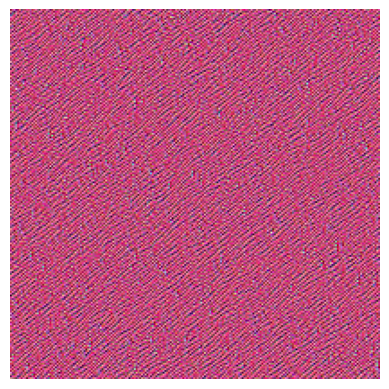

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=1)))

### Generating a grid of all filter response patterns in a layer

In [ ]:
all_images = []
for filter_index in range(activation.shape[-1]):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(generate_filter_pattern(filter_index))
    all_images.append(image)

margin = 5
nrows = 3
ncols = (len(all_images)) // nrows
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = ncols * cropped_width + (ncols - 1) * margin
height = ncols * cropped_height + (ncols - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(ncols):
    for j in range(ncols):
        image = all_images[i * ncols + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :] = image
        if (i * ncols + j) == (len(all_images) - 1): break
    if (i * ncols + j) == (len(all_images) - 1): break

keras.utils.save_img(f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23


# Load Models


## Mobile Net

In [ ]:
plot_misclassified_images(model, data_generator=test_set, num_images_per_class=6)

In [ ]:
plot_successful_predictions(model, data_generator=val_set, num_images_per_class=5)

## Teachable Machine